In [1]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level
set_log_level("ERROR")

In [3]:
df = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial01.csv")
df.head()

,ds,y
0,2014-12-31,65.41
1,2015-01-01,62.09
2,2015-01-02,69.44
3,2015-01-03,65.22
4,2015-01-04,58.91


Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 46it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - C:\Users\zacha\AppData\Roaming\Python\Python311\site-packages\neuralprophet\plot_forecast_plotly.py:100: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ds = fcst["ds"].dt.to_pydatetime()



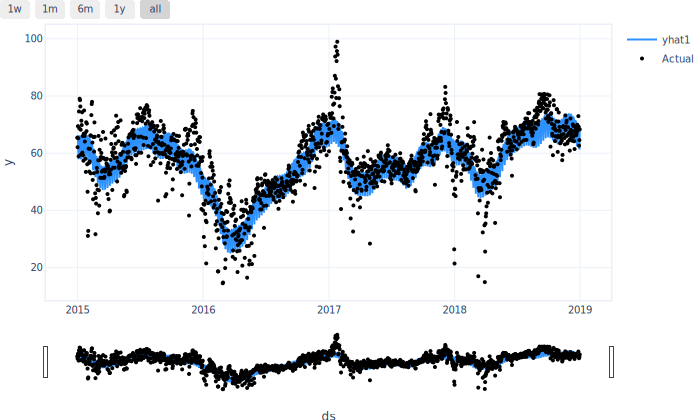

In [5]:
model = NeuralProphet()
model.set_plotting_backend("plotly-static")
metrics = model.fit(df)
forecast = model.predict(df)
model.plot(forecast)

In [12]:
conf = 0.9

boundaries = round((1 - conf) / 2, 2)
quantiles = [boundaries, conf + boundaries]

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 46it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - C:\Users\zacha\AppData\Roaming\Python\Python311\site-packages\neuralprophet\plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




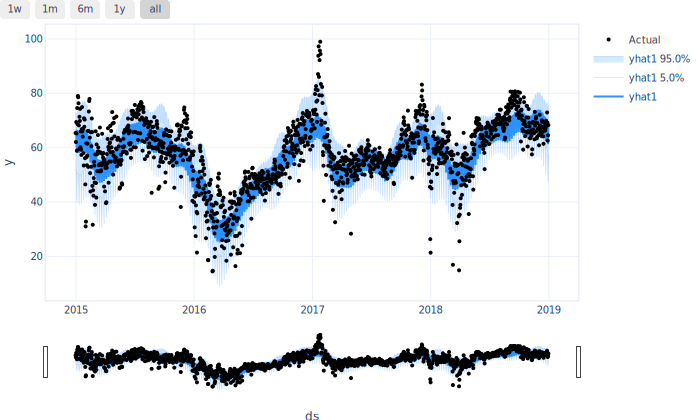

In [13]:
model = NeuralProphet(quantiles = quantiles)
model.set_plotting_backend('plotly-static')

metrics = model.fit(df)
forecast = model.predict(df) 
model.plot(forecast)

Predicting: 46it [00:00, ?it/s]

Predicting: 46it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - C:\Users\zacha\AppData\Roaming\Python\Python311\site-packages\neuralprophet\uncertainty.py:110: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


WARNING - (py.warnings._showwarnmsg) - C:\Users\zacha\AppData\Roaming\Python\Python311\site-packages\neuralprophet\plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




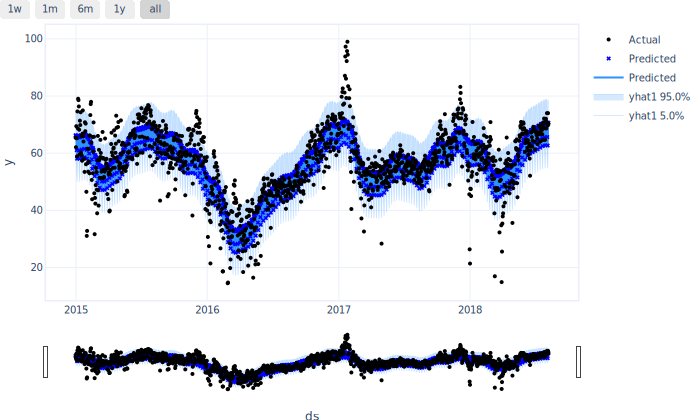

In [15]:
train_df, cal_df = model.split_df(df, valid_p = 0.1)
method = "naive"  # or "cqr" for a more sophisticated method, see uncertainty tutorial
conformal_forecast = model.conformal_predict(train_df, cal_df, alpha = 0.1, method = method)
model.highlight_nth_step_ahead_of_each_forecast(1).plot(conformal_forecast)